In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import SALib
import pickle
import os

### Working directories

In [4]:
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

In [5]:
if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

In [6]:
#groups_Pb = ['$N$', 'T$_\mathrm{R}$ENTo','FS', '$\\eta/s$', '$\\zeta/s$', '$T_{\\mathrm{sw}}$' ]
groups_Pb = ['$N$', 'T$_\mathrm{R}$E','FS', '$\\eta/s$', '$\\zeta/s$', '$T_{\\mathrm{sw}}$' ]


groups_Au = ['$N$', 'T$_\mathrm{R}$E','FS', '$\\eta/s$', '$\\zeta/s$', '$T_{\\mathrm{sw}}$' ]

'$ {\langle}p_T{\rangle}_{\pi}$ [0 5]'

'${\langle}p_T{\rangle}$'

'$dN_{\pi}$/dy [0 5]'

In [7]:
observables_Pb = ['$dN_{ch}$/$d\eta$ [0 5]',
 '$dN_{ch}$/$d\eta$ [60 70]',
 '$dN_{\pi}$/dy [0 5]',
 '$dN_{\pi}$/dy[60 70]',
# 'dN_dy_kaon[0 5]',
# 'dN_dy_kaon[60 70]',
# 'dN_dy_proton[0 5]',
# 'dN_dy_proton[60 70]',
 '$<p_T>_{\pi}$ [0 5]',
 '$<p_T>_{\pi}$ [60 70]',
# 'mean_pT_kaon[0 5]',
# 'mean_pT_kaon[60 70]',               
# 'mean_pT_proton[0 5]',
# 'mean_pT_proton[60 70]',
 '$\delta p_{T}/p_{T}$ [0 5]',
 '$\delta p_{T}/p_{T}$ [55 60]',
 '$v_2\{2\}$ [0 5]',
  '$v_2\{2\}$ [60 70]']

In [8]:
observables_Au = ['$dN_{\pi}$/dy[0 5]',
 '$dN_{\pi}$/dy[40 50]',
# 'dN_dy_kaon[0 5]',
# 'dN_dy_kaon[60 70]',
# 'dN_dy_proton[0 5]',
# 'dN_dy_proton[60 70]',
 '$<p_T>_{\pi}$ [0 5]',
 '$<p_T>_{\pi}$ [40 50]',
# 'mean_pT_kaon[0 5]',
# 'mean_pT_kaon[60 70]',               
# 'mean_pT_proton[0 5]',
# 'mean_pT_proton[60 70]',
 '$v_2\{2\}$ [0 5]',
  '$v_2\{2\}$ [40 50]']

### Load the sobol index from disk

In [9]:
with open(data_path('PbPbCEsobolgroup_index'),"rb") as f:
    S_Pb_CE=pickle.load(f)
with open(data_path('PbPbPTBsobolgroup_index'),"rb") as f:
    S_Pb_PTB=pickle.load(f)
with open(data_path('PbPbGradsobolgroup_index'),"rb") as f:
    S_Pb_Grad=pickle.load(f)
with open(data_path('AuAusobolgroup_index'),"rb") as f:
    S_Au_Grad=pickle.load(f)
with open(data_path('PbPbforAusobolgroup_index'),"rb") as f:
    S_Pb_Grad_for_Au_Grad=pickle.load(f)

In [23]:

sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

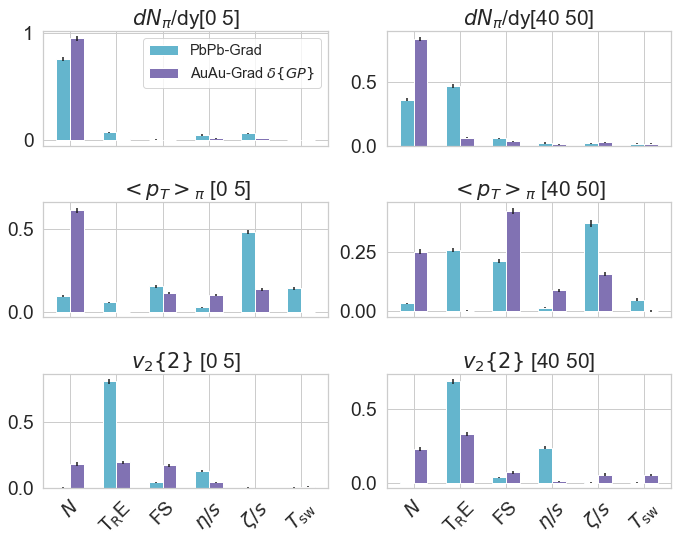

In [61]:
# Plot S total for Pb
sns.set_context('paper')
sns.set(font_scale = 1.75)
sns.set_style('whitegrid')
fig, axs = plt.subplots(3,2, figsize=(10,8),sharex=True)
axs= axs.flatten()
for i, ax in enumerate(axs):
    base = S_Pb_Grad_for_Au_Grad[i]['S1']
    base_er = S_Pb_Grad_for_Au_Grad[i]['S1_conf']
    Au = S_Au_Grad[i]['S1']
    Au_er = S_Au_Grad[i]['S1_conf']
    x_set = np.arange(0,6)
    
#     df_au_row = np.concatenate((Au,['Au-Grad $\delta\{GP\}$']))
#     df_au_er_row = np.concatenate((Au_er,['Au-Grad $\delta\{GP\}$']))
#     df_base_row = np.concatenate((base,['PbPb-Grad']))
#     df_base_er_row = np.concatenate((base_er,['PbPb-Grad']))
#     data = np.vstack((df_au_row,df_au_er_row))
    
#     data = pd.DataFrame(data=)
#     g = sns.catplot(
#     data=penguins, kind="bar",
#     x="species", y="body_mass_g", hue="sex",
#     ci="sd", palette="dark", alpha=.6, height=6)
#     g.despine(left=True)
#     g.set_axis_labels("", "Body mass (g)")
#     g.legend.set_title("")

    width =0.3
    ax.bar(x_set, base, yerr=base_er, color=sns.color_palette()[9], label = 'PbPb-Grad', width =width)
    ax.bar(x_set+width, Au, yerr=Au_er, color=sns.color_palette()[4], label = 'AuAu-Grad $\delta\{GP\}$', width =width)
    #ax.errorbar(x_set, PTB, yerr=PTB_er, fmt='p', c='blue', label = 'Pb-PTB')
    if i==0:
        ax.legend(fontsize='x-small')
    ax.set_title(observables_Au[i])
    ax.set_xticks(x_set+(width/2))
    ax.set_xticklabels(groups_Au, rotation=45)
    #plt.xticks(, ha='middle')
plt.tight_layout()
#fig.suptitle('Sobol first order sensitvity')
fig.savefig('Ausobolgroup_bar.png',dpi=100)

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


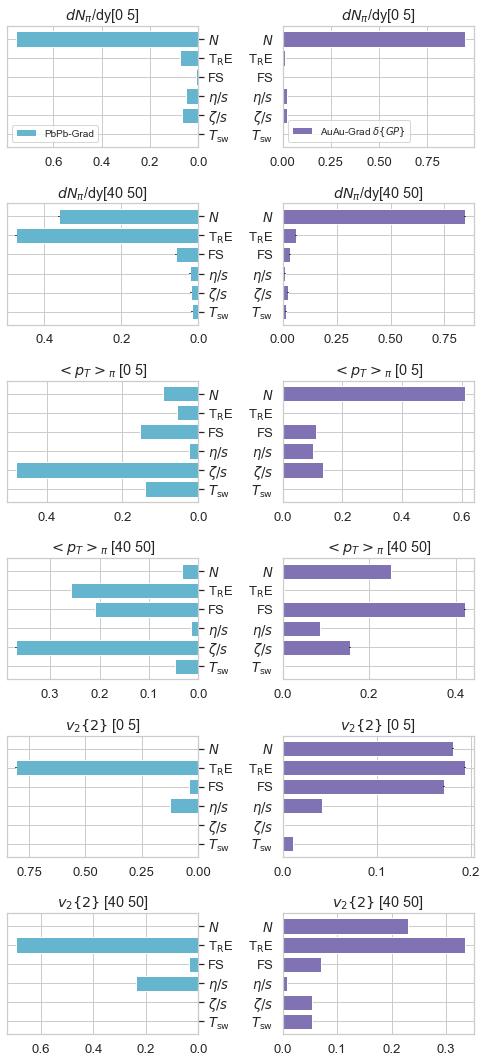

In [64]:
# Plot S total for Pb
sns.set_context('paper')
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
fig, axs = plt.subplots(6,2, figsize=(7,15),sharey=False)
#axs= axs.flatten()
for i in range(0,6):
    ax1 = axs[i][0]
    ax2 = axs[i][1]
    
    base = S_Pb_Grad_for_Au_Grad[i]['S1']
    base_er = S_Pb_Grad_for_Au_Grad[i]['S1_conf']
    Au = S_Au_Grad[i]['S1']
    Au_er = S_Au_Grad[i]['S1_conf']
    x_set = np.arange(0,6)
    
    width =0.3
    ax1.barh(x_set, base, yerr=base_er, color=sns.color_palette()[9], label = 'PbPb-Grad')
    ax2.barh(x_set, Au, yerr=Au_er, color=sns.color_palette()[4], label = 'AuAu-Grad $\delta\{GP\}$')
    
    #ax.errorbar(x_set, PTB, yerr=PTB_er, fmt='p', c='blue', label = 'Pb-PTB')
    if i==0:
        ax1.legend(fontsize='x-small')
        ax2.legend(fontsize='x-small')
    
    ax1.set_title(observables_Au[i],loc='center')
    ax2.set_title(observables_Au[i],loc='center')
    ax1.set_yticks(x_set)
    ax1.set_yticklabels(groups_Au)
    ax2.set_yticklabels(groups_Au)
    ax2.set_yticks(x_set)
    
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    #ax2.set_yticks(x_set)
    #plt.xticks(, ha='middle')
plt.tight_layout()
#fig.suptitle('Sobol first order sensitvity')
fig.savefig('Ausobolgroup_bar_togeather.png',dpi=100)

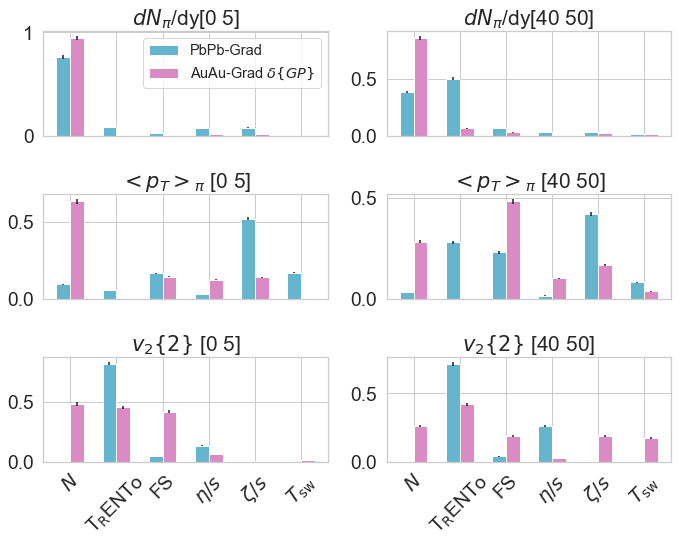

In [11]:
# Plot S total for Pb
sns.set_context('paper')
sns.set(font_scale = 1.75)
sns.set_style('whitegrid')
fig, axs = plt.subplots(3,2, figsize=(10,8),sharex=True)
axs= axs.flatten()
for i, ax in enumerate(axs):
    base = S_Pb_Grad_for_Au_Grad[i]['ST']
    base_er = S_Pb_Grad_for_Au_Grad[i]['ST_conf']
    Au = S_Au_Grad[i]['ST']
    Au_er = S_Au_Grad[i]['ST_conf']
    x_set = np.arange(0,6)
    
#     df_au_row = np.concatenate((Au,['Au-Grad $\delta\{GP\}$']))
#     df_au_er_row = np.concatenate((Au_er,['Au-Grad $\delta\{GP\}$']))
#     df_base_row = np.concatenate((base,['PbPb-Grad']))
#     df_base_er_row = np.concatenate((base_er,['PbPb-Grad']))
#     data = np.vstack((df_au_row,df_au_er_row))
    
#     data = pd.DataFrame(data=)
#     g = sns.catplot(
#     data=penguins, kind="bar",
#     x="species", y="body_mass_g", hue="sex",
#     ci="sd", palette="dark", alpha=.6, height=6)
#     g.despine(left=True)
#     g.set_axis_labels("", "Body mass (g)")
#     g.legend.set_title("")

    width =0.3
    ax.bar(x_set, base, yerr=base_er, color=sns.color_palette()[9], label = 'PbPb-Grad', width =width)
    ax.bar(x_set+width, Au, yerr=Au_er, color=sns.color_palette()[6], label = 'AuAu-Grad $\delta\{GP\}$', width =width)
    #ax.errorbar(x_set, PTB, yerr=PTB_er, fmt='p', c='blue', label = 'Pb-PTB')
    if i==0:
        ax.legend(fontsize='x-small')
    ax.set_title(observables_Au[i])
    ax.set_xticks(x_set+(width/2))
    ax.set_xticklabels(groups_Au, rotation=45)
    #plt.xticks(, ha='middle')
plt.tight_layout()
#fig.suptitle('Sobol first order sensitvity')
fig.savefig('AusobolgroupTotal_bar.png',dpi=100)

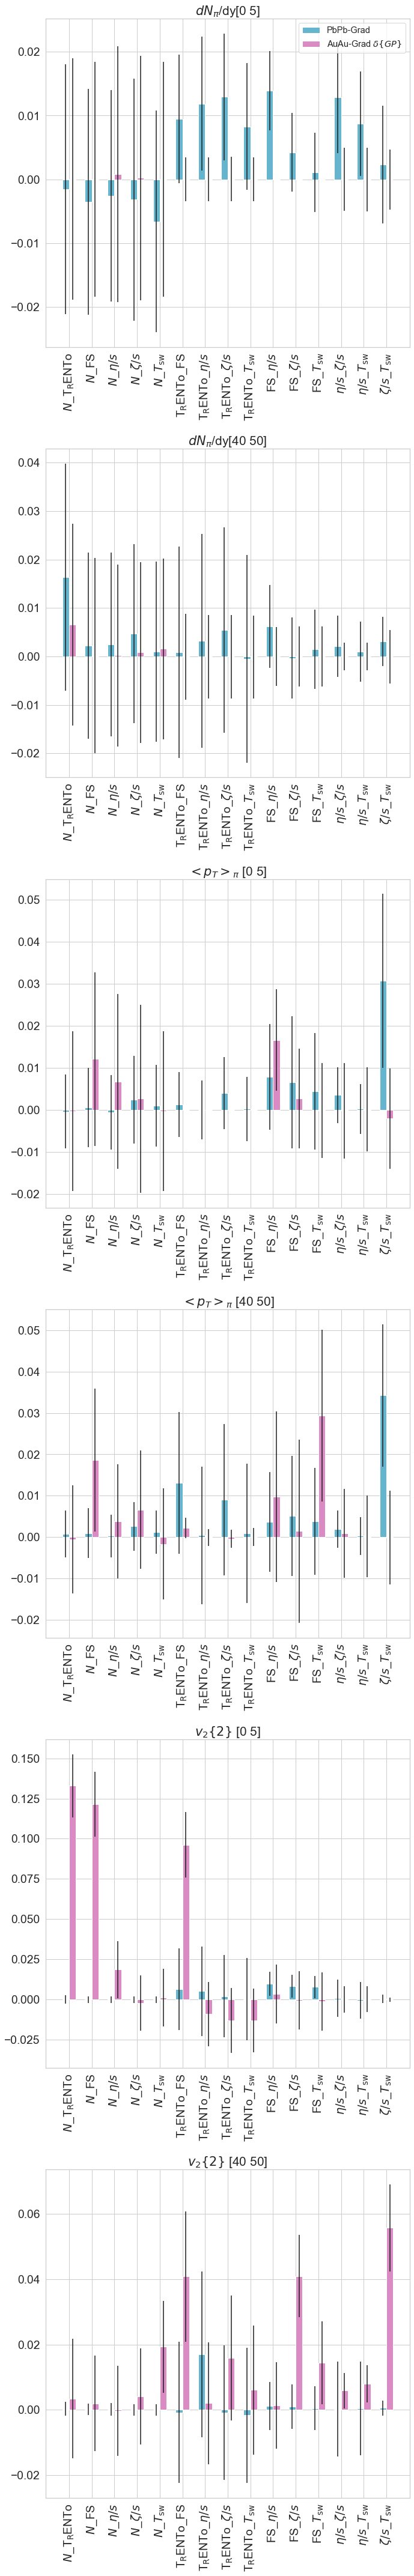

In [12]:
# Plot S total for Pb
sns.set_context('paper')
sns.set(font_scale = 1.75)
sns.set_style('whitegrid')
fig, axs = plt.subplots(6,1, figsize=(10,60),sharex=False)
axs= axs.flatten()
for i, ax in enumerate(axs):
    base = []
    base_er = []
    Au = []
    Au_er = []
    x_label = []
    for ii in range(0,5):
        for jj in range(ii+1,6):
            base.append(S_Pb_Grad_for_Au_Grad[i]['S2'][ii,jj])
            base_er.append(S_Pb_Grad_for_Au_Grad[i]['S2_conf'][ii,jj])
            Au.append(S_Au_Grad[i]['S2'][ii,jj])
            Au_er.append(S_Au_Grad[i]['S2_conf'][ii,jj])
            x_label.append(f'{groups_Au[ii]}_{groups_Au[jj]}')
    
    width =0.3
    x_set = np.arange(0,len(x_label))
    ax.bar(x_set, base, yerr=base_er, color=sns.color_palette()[9], label = 'PbPb-Grad', width =width)
    ax.bar(x_set+width, Au, yerr=Au_er, color=sns.color_palette()[6], label = 'AuAu-Grad $\delta\{GP\}$', width =width)
    #ax.errorbar(x_set, PTB, yerr=PTB_er, fmt='p', c='blue', label = 'Pb-PTB')
    if i==0:
        ax.legend(fontsize='x-small')
    ax.set_title(observables_Au[i])
    ax.set_xticks(x_set+(width/2))
    ax.set_xticklabels(x_label, rotation=90)
    #plt.xticks(, ha='middle')
plt.tight_layout()
#fig.suptitle('Sobol first order sensitvity')
fig.savefig('AusobolgroupCorr_bar.png',dpi=100)

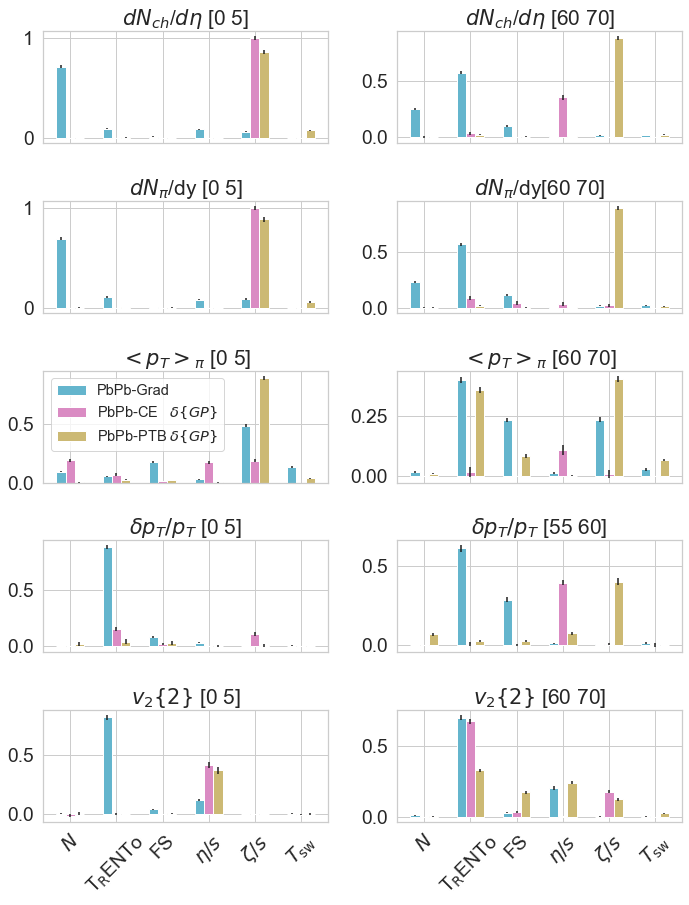

In [13]:
# Plot S total for Au
sns.set_context('paper')
sns.set(font_scale = 1.75)
sns.set_style('whitegrid')
fig, axs = plt.subplots(5,2, figsize=(10,13), sharex=True)
axs= axs.flatten()
for i, ax in enumerate(axs):
    if i in [10,11,12]:
        ax.axis('off')
        continue;
    base = S_Pb_Grad[i]['S1']
    base_er = S_Pb_Grad[i]['S1_conf']
    CE = S_Pb_CE[i]['S1']
    CE_er = S_Pb_CE[i]['S1_conf']
    PTB = S_Pb_PTB[i]['S1']
    PTB_er = S_Pb_PTB[i]['S1_conf']
    x_set = np.arange(0,6)
    width = 0.2
    ax.bar(x_set, base, yerr=base_er, color=sns.color_palette()[9] , label = 'PbPb-Grad', width=width)
    ax.bar(x_set+width, CE, yerr=CE_er,  color=sns.color_palette()[6], label = 'PbPb-CE   $\delta \{GP\}$', width=width)
    ax.bar(x_set+2*width, PTB, yerr=PTB_er,  color=sns.color_palette()[8], label = 'PbPb-PTB $\delta\{GP\}$', width=width)
    if i==4:
        ax.legend(loc='upper left',fontsize='x-small')
    ax.set_title(observables_Pb[i])
    ax.set_xticks(x_set+width)
    ax.set_xticklabels(groups_Pb, rotation=45)
plt.tight_layout()
#fig.suptitle('Sobol first order sensitvity')
fig.savefig('Pbsobolgroup_bar.png',dpi=100)

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


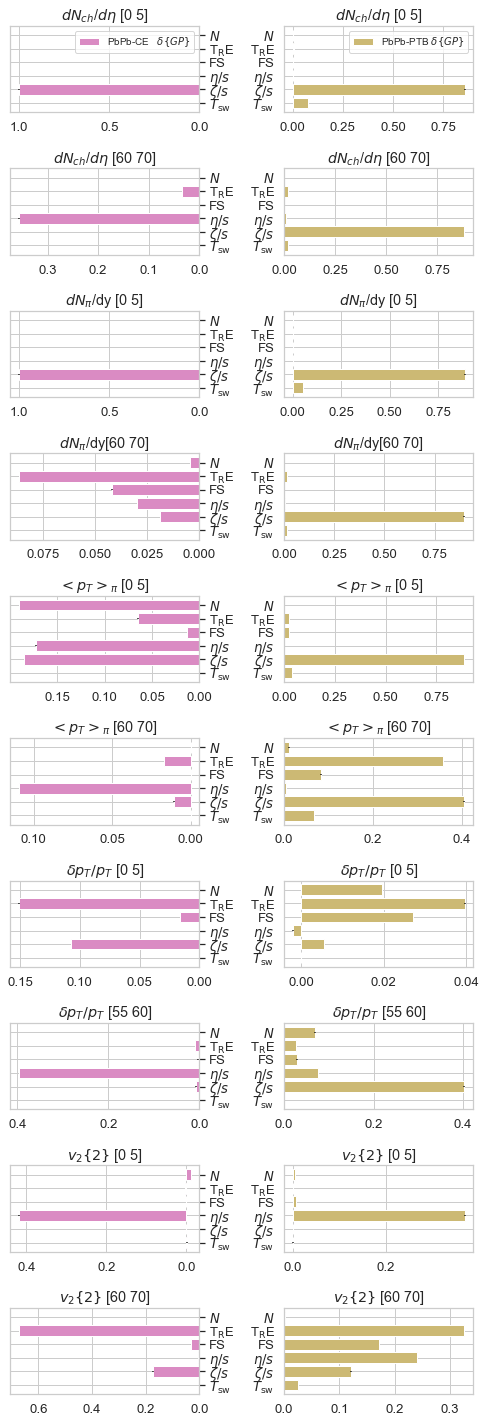

In [66]:
# Plot S total for Pb
sns.set_context('paper')
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
fig, axs = plt.subplots(10,2, figsize=(7,20),sharey=False)
#axs= axs.flatten()
for i in range(0,10):
    ax1 = axs[i][0]
    ax2 = axs[i][1]
    
    base = S_Pb_Grad[i]['S1']
    base_er = S_Pb_Grad[i]['S1_conf']
    CE = S_Pb_CE[i]['S1']
    CE_er = S_Pb_CE[i]['S1_conf']
    PTB = S_Pb_PTB[i]['S1']
    PTB_er = S_Pb_PTB[i]['S1_conf']
    x_set = np.arange(0,6)
    
    width =0.3
    ax1.barh(x_set, CE, yerr=CE_er, color=sns.color_palette()[6], label = 'PbPb-CE   $\delta \{GP\}$')
    ax2.barh(x_set, PTB, yerr=PTB_er, color=sns.color_palette()[8], label = 'PbPb-PTB $\delta\{GP\}$')
    
    #ax.errorbar(x_set, PTB, yerr=PTB_er, fmt='p', c='blue', label = 'Pb-PTB')
    if i==0:
        ax1.legend(fontsize='x-small')
        ax2.legend(fontsize='x-small')
    
    ax1.set_title(observables_Pb[i],loc='center')
    ax2.set_title(observables_Pb[i],loc='center')
    ax1.set_yticks(x_set)
    ax1.set_yticklabels(groups_Pb)
    ax2.set_yticklabels(groups_Pb)
    ax2.set_yticks(x_set)
    
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    ax2.invert_yaxis()
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()
    #ax2.set_yticks(x_set)
    #plt.xticks(, ha='middle')
plt.tight_layout()
#fig.suptitle('Sobol first order sensitvity')
fig.savefig('Pbsobolgroup_bar_togeather.png',dpi=100)

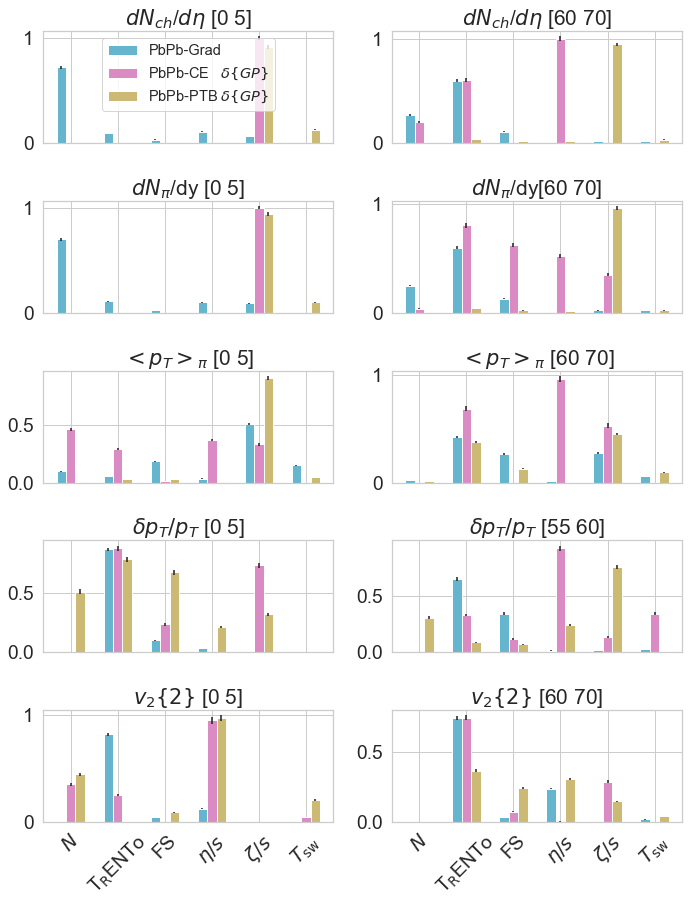

In [14]:
# Plot S total for Au
sns.set_context('paper')
sns.set(font_scale = 1.75)
sns.set_style('whitegrid')
fig, axs = plt.subplots(5,2, figsize=(10,13), sharex=True)
axs= axs.flatten()
for i, ax in enumerate(axs):
    if i in [10,11,12]:
        ax.axis('off')
        continue;
    base = S_Pb_Grad[i]['ST']
    base_er = S_Pb_Grad[i]['ST_conf']
    CE = S_Pb_CE[i]['ST']
    CE_er = S_Pb_CE[i]['ST_conf']
    PTB = S_Pb_PTB[i]['ST']
    PTB_er = S_Pb_PTB[i]['ST_conf']
    x_set = np.arange(0,6)
    width = 0.2
    ax.bar(x_set, base, yerr=base_er, color=sns.color_palette()[9] , label = 'PbPb-Grad', width=width)
    ax.bar(x_set+width, CE, yerr=CE_er,  color=sns.color_palette()[6], label = 'PbPb-CE   $\delta \{GP\}$', width=width)
    ax.bar(x_set+2*width, PTB, yerr=PTB_er,  color=sns.color_palette()[8], label = 'PbPb-PTB $\delta\{GP\}$', width=width)
    if i==0:
        ax.legend(loc='upper center',fontsize='x-small')
    ax.set_title(observables_Pb[i])
    ax.set_xticks(x_set+width)
    ax.set_xticklabels(groups_Pb, rotation=45)
plt.tight_layout()
#fig.suptitle('Sobol first order sensitvity')
fig.savefig('PbsobolgroupTotal_bar.png',dpi=100)

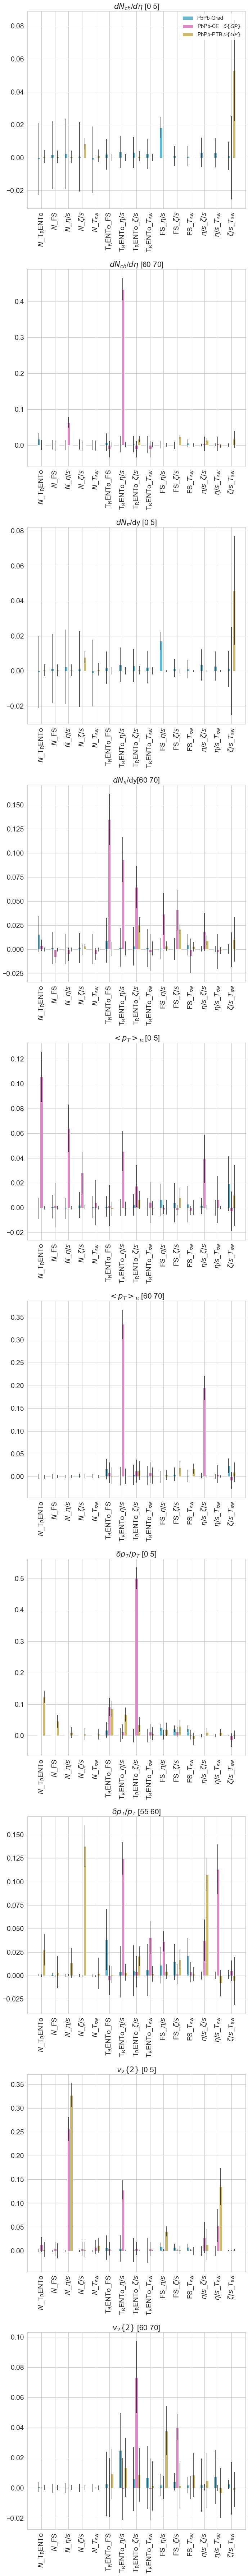

In [15]:
# Plot S total for Pb
sns.set_context('paper')
sns.set(font_scale = 1.75)
sns.set_style('whitegrid')
fig, axs = plt.subplots(10,1, figsize=(10,100),sharex=False)
axs= axs.flatten()
for i, ax in enumerate(axs):
    base = []
    base_er = []
    PbCE = []
    PbCE_er = []
    PbPTB = []
    PbPTB_er = []
    x_label = []
    for ii in range(0,5):
        for jj in range(ii+1,6):
            base.append(S_Pb_Grad[i]['S2'][ii,jj])
            base_er.append(S_Pb_Grad[i]['S2_conf'][ii,jj])
            PbCE.append(S_Pb_CE[i]['S2'][ii,jj])
            PbCE_er.append(S_Pb_CE[i]['S2_conf'][ii,jj])
            PbPTB.append(S_Pb_PTB[i]['S2'][ii,jj])
            PbPTB_er.append(S_Pb_PTB[i]['S2_conf'][ii,jj])
            x_label.append(f'{groups_Pb[ii]}_{groups_Pb[jj]}')
    
    width =0.2
    x_set = np.arange(0,len(x_label))
    ax.bar(x_set, base, yerr=base_er, color=sns.color_palette()[9], label = 'PbPb-Grad', width =width)
    ax.bar(x_set+width, PbCE, yerr=PbCE_er,  color=sns.color_palette()[6], label = 'PbPb-CE   $\delta \{GP\}$', width =width)
    ax.bar(x_set+2*width, PbPTB, yerr=PbPTB_er,  color=sns.color_palette()[8], label = 'PbPb-PTB $\delta\{GP\}$', width =width)


    #ax.errorbar(x_set, PTB, yerr=PTB_er, fmt='p', c='blue', label = 'Pb-PTB')
    if i==0:
        ax.legend(fontsize='x-small')
    ax.set_title(observables_Pb[i])
    ax.set_xticks(x_set+(width))
    ax.set_xticklabels(x_label, rotation=90)
    #plt.xticks(, ha='middle')
plt.tight_layout()
#fig.suptitle('Sobol first order sensitvity')
fig.savefig('PbbsobolgroupCorr_bar.png',dpi=100)